In [1]:
from astropy.io import fits 
import matplotlib.pyplot as plt
import numpy as np 

In [2]:
data = fits.open("/home/andresgo/Documents/Solar Astrophysics/Homework 2/6300_synth.fits")

In [3]:
data.info()

Filename: /home/andresgo/Documents/Solar Astrophysics/Homework 2/6300_synth.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   (131, 4, 288, 288)   float64   
  1                1 ImageHDU         6   (131,)   float64   


In [4]:
stokes0 = data[0].data
ll = data[1].data
print(ll)

[6300.7  6300.72 6300.74 6300.76 6300.78 6300.8  6300.82 6300.84 6300.86
 6300.88 6300.9  6300.92 6300.94 6300.96 6300.98 6301.   6301.02 6301.04
 6301.06 6301.08 6301.1  6301.12 6301.14 6301.16 6301.18 6301.2  6301.22
 6301.24 6301.26 6301.28 6301.3  6301.32 6301.34 6301.36 6301.38 6301.4
 6301.42 6301.44 6301.46 6301.48 6301.5  6301.52 6301.54 6301.56 6301.58
 6301.6  6301.62 6301.64 6301.66 6301.68 6301.7  6301.72 6301.74 6301.76
 6301.78 6301.8  6301.82 6301.84 6301.86 6301.88 6301.9  6301.92 6301.94
 6301.96 6301.98 6302.   6302.02 6302.04 6302.06 6302.08 6302.1  6302.12
 6302.14 6302.16 6302.18 6302.2  6302.22 6302.24 6302.26 6302.28 6302.3
 6302.32 6302.34 6302.36 6302.38 6302.4  6302.42 6302.44 6302.46 6302.48
 6302.5  6302.52 6302.54 6302.56 6302.58 6302.6  6302.62 6302.64 6302.66
 6302.68 6302.7  6302.72 6302.74 6302.76 6302.78 6302.8  6302.82 6302.84
 6302.86 6302.88 6302.9  6302.92 6302.94 6302.96 6302.98 6303.   6303.02
 6303.04 6303.06 6303.08 6303.1  6303.12 6303.14 6303

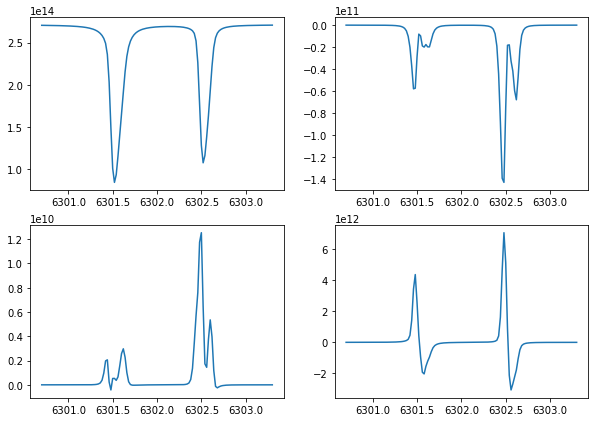

In [5]:
x_coordinate = 18
y_coordinate = 202
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,0])
plt.subplot(222)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,1])
plt.subplot(223)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,2])
plt.subplot(224)
plt.plot(ll,stokes0[x_coordinate,y_coordinate,3])

In [6]:
# Telescope / observing specifications:
D = 4E2 # Diameter in cm 
t = 1 # Exposure in s 
dlambda = (ll[1]-ll[0])*1E-8 # Lambda bin in cm 
au = 150E11 # 1 AU in cm 
a = 20E5 # Pixel size "on the sun" in cm 
pi = np.pi # 3.14, we will use this often 
deltaE = 6.626E-27 * 2.997E10/6300.E-8 # Energy of the photon 
conversion = a**2.0 * (D/2.)**2.0 * pi / au ** 2.0 * dlambda * 1 / deltaE 
print(conversion)

1.4174890342993653e-07


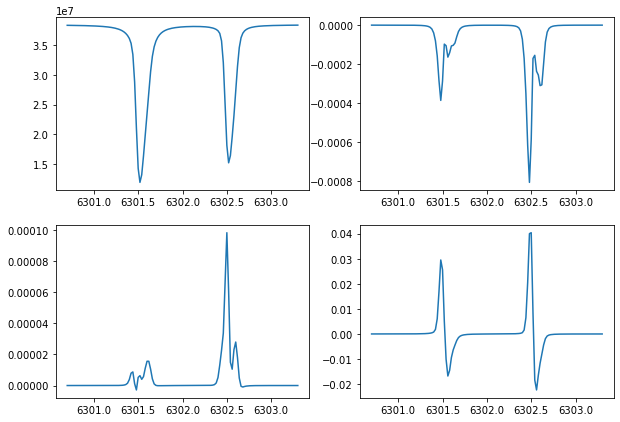

In [7]:
stokes = stokes0 * conversion
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,stokes[x_coordinate,y_coordinate,0])
plt.subplot(222)
plt.plot(ll,stokes[x_coordinate,y_coordinate,1]/stokes[x_coordinate,y_coordinate,0])
plt.subplot(223)
plt.plot(ll,stokes[x_coordinate,y_coordinate,2]/stokes[x_coordinate,y_coordinate,0])
plt.subplot(224)
plt.plot(ll,stokes[x_coordinate,y_coordinate,3]/stokes[x_coordinate,y_coordinate,0])

In [8]:
def modulation_row(Delta,alpha,cQ,cU,cV):
    row = np.zeros(4)
    row[0] = 1.0
    row[1] = cQ*(1.+np.cos(Delta)+np.cos(4.*alpha)*(1.-np.cos(Delta)))*0.5
    row[2] = cU*(np.sin(4.*alpha)*(1.-np.cos(Delta)))*0.5
    row[3] = cV*(-1.*np.sin(2.*alpha)*np.sin(Delta))
    row = row.reshape(1,4)
    return row 

In [9]:
# Let's make the modulation matrix of te linear polarizer and a rotating wave-plate 
# This matrix use for Delta 127°, and for alpha (=omega*t) 180° divided in 8, both in radians
O8 = modulation_row(127*pi/180,pi/8,1,1,-1)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/4,-1,1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,3*pi/8,-1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi/2,1,-1,-1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,5*pi/8,1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,3*pi/4,-1,1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,7*pi/8,-1,-1,1)],axis=0)
O8 = np.concatenate([O8,modulation_row(127*pi/180,pi,1,-1,1)],axis=0)
print(O8)                               

[[ 1.00000000e+00  1.99092488e-01  8.00907512e-01  5.64720585e-01]
 [ 1.00000000e+00  6.01815023e-01  9.80828820e-17  7.98635510e-01]
 [ 1.00000000e+00 -1.99092488e-01  8.00907512e-01  5.64720585e-01]
 [ 1.00000000e+00  1.00000000e+00  1.96165764e-16  9.78046421e-17]
 [ 1.00000000e+00  1.99092488e-01  8.00907512e-01  5.64720585e-01]
 [ 1.00000000e+00  6.01815023e-01  2.94248646e-16  7.98635510e-01]
 [ 1.00000000e+00 -1.99092488e-01  8.00907512e-01  5.64720585e-01]
 [ 1.00000000e+00  1.00000000e+00  3.92331528e-16  1.95609284e-16]]


In [10]:
O8_inv = np.linalg.solve(np.dot(np.transpose(O8),O8), np.transpose(O8))
print(O8_inv)

[[-1.25569780e+00  1.72159791e-15  1.25569780e+00  5.00000000e-01
  -1.25569780e+00  6.66415898e-16  1.25569780e+00  5.00000000e-01]
 [ 1.25569780e+00 -1.66532596e-15 -1.25569780e+00 -2.22043462e-15
   1.25569780e+00 -6.24497237e-16 -1.25569780e+00 -8.84704419e-16]
 [ 1.43854864e+00 -4.41440972e-01 -8.14256829e-01 -1.82850838e-01
   1.43854864e+00 -4.41440972e-01 -8.14256829e-01 -1.82850838e-01]
 [ 6.26067829e-01  6.26067829e-01 -6.26067829e-01 -6.26067829e-01
   6.26067829e-01  6.26067829e-01 -6.26067829e-01 -6.26067829e-01]]


In [11]:
# Calculating polarimetric efficiencies 
print(1./np.sqrt(8.*np.sum(O8_inv**2.0,axis=1)))

[0.13551073 0.14077965 0.14529137 0.19965888]


In [19]:
# Modulation approach similar to the class

I_original = stokes[x_coordinate,y_coordinate]
nl = len(ll)
S_measured = np.zeros([8,nl]) 
for l in range(0,nl):
    S_measured[:,l] = np.dot(O8,I_original[:,l])

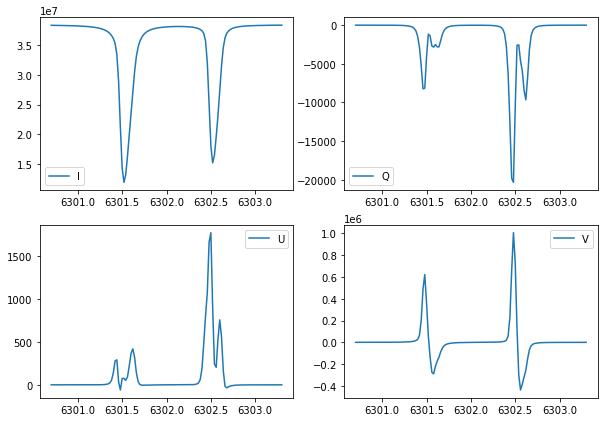

In [27]:
# Demodulation approach similar to the class

I_inferred = np.zeros([4,nl])
for l in range(0,nl):
    I_inferred[:,l] = np.dot(O8_inv,S_measured[:,l])
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.plot(ll,I_inferred[0],label='I')
plt.legend()
plt.subplot(222)
plt.plot(ll,I_inferred[1],label='Q')
plt.legend()
plt.subplot(223)
plt.plot(ll,I_inferred[2],label='U')
plt.legend()
plt.subplot(224)
plt.plot(ll,I_inferred[3],label='V')
plt.legend()
plt.savefig('Problem1.png',dpi=300)

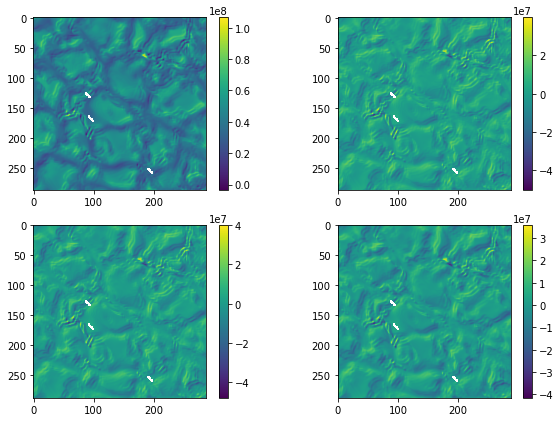

In [14]:
I_original = stokes[:,:,:,0]
S_measured = np.zeros([288,288,8])
I_inferred = np.zeros([288,288,4])
I_1 = np.roll(I_original,(1,1),axis=(0,1))
I_2 = np.roll(I_original,(2,2),axis=(0,1))
I_3 = np.roll(I_original,(3,3),axis=(0,1))
I_4 = np.roll(I_original,(4,4),axis=(0,1))
I_5 = np.roll(I_original,(5,5),axis=(0,1))
I_6 = np.roll(I_original,(6,6),axis=(0,1))
I_7 = np.roll(I_original,(7,7),axis=(0,1))
I_8 = np.roll(I_original,(8,8),axis=(0,1))


for i in range(0,288):
    for j in range(0,288):
        S_measured[i,j,0] = np.dot(O8[0,:],I_1[i,j,:])
        S_measured[i,j,1] = np.dot(O8[1,:],I_2[i,j,:])
        S_measured[i,j,2] = np.dot(O8[2,:],I_3[i,j,:])
        S_measured[i,j,3] = np.dot(O8[3,:],I_4[i,j,:])
        S_measured[i,j,4] = np.dot(O8[4,:],I_5[i,j,:])
        S_measured[i,j,5] = np.dot(O8[5,:],I_6[i,j,:])
        S_measured[i,j,6] = np.dot(O8[6,:],I_7[i,j,:])
        S_measured[i,j,7] = np.dot(O8[7,:],I_8[i,j,:])
        I_inferred[i,j,:] = np.dot(O8_inv,S_measured[i,j,:])
plt.figure(figsize=[10,7])
plt.subplot(221)
plt.imshow(I_inferred[:,:,0])
plt.colorbar()
plt.subplot(222)
plt.imshow(I_inferred[:,:,1])
plt.colorbar()
plt.subplot(223)
plt.imshow(I_inferred[:,:,2])
plt.colorbar()
plt.subplot(224)
plt.imshow(I_inferred[:,:,3])
plt.colorbar()